# 1. Opening and cleaning

In [328]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [329]:
columns_to_keep = ["BindingDB Reactant_set_id",
                    "SMILES",
                    "Ligand InChI",
                    "InChI_Key",
                    "BindingDB_ID",
                    "BindingDB Ligand Name",
                    "Target Name",
                    "Target Source Organism According to Curator or DataSource",
                    "Ki (nM)",
                    "IC50 (nM)",
                    "Kd (nM)",
                    "EC50 (nM)",
                    "kon (M-1-s-1)",
                    "koff (s-1)",
                    "pH",
                    "Temp (C)",
                    "Curation/DataSource",
                    "Article DOI",
                    "BindingDB Entry DOI",
                    "PMID",
                    "PubChem AID",
                    "Patent Number",
                    "Authors",
                    "Institution",
                    "Link to Ligand in BindingDB",
                    "Link to Target in BindingDB",
                    "Link to Ligand-Target Pair in BindingDB",
                    "Ligand HET ID in PDB",
                    "PDB ID(s) for Ligand-Target Complex",
                    "PubChem_CID",
                    "PubChem SID",
                    "ChEBI_ID",
                    "ChEMBL_ID",
                    "DrugBank_ID",
                    "IUPHAR_GRAC ID of Ligand",
                    "KEGG_ID",
                    "ZINC_ID",
                    "Number of Protein Chains in Target (>1 implies a multichain complex)",
                    "BindingDB Target Chain Sequence",
                    "PDB ID(s) of Target Chain",
                    "UniProt (SwissProt) Recommended Name of Target Chain",
                    "UniProt (SwissProt) Entry Name of Target Chain",
                    "UniProt (SwissProt) Primary ID of Target Chain",
                    "UniProt (SwissProt) Secondary ID(s) of Target Chain",
                    "UniProt (SwissProt) Alternative ID(s) of Target Chain",
                    "UniProt (TrEMBL) Submitted Name of Target Chain",
                    "UniProt (TrEMBL) Entry Name of Target Chain",
                    "UniProt (TrEMBL) Primary ID of Target Chain",
                    "UniProt (TrEMBL) Secondary ID(s) of Target Chain",
                    "UniProt (TrEMBL) Alternative ID(s) of Target Chain",
                    "Unique_ID",
                    "SMILES_BindingDB",
                    "InChI_Key_BindingDB",
                    "BindingDB_ID_BindingDB",
                    "ChEBI_ID_BindingDB",
                    "ChEMBL_ID_BindingDB",
                    "DrugBank_ID_BindingDB",
                    "DrugBank_ID_DrugBank",
                    "name_x",
                    "unii",
                    "toxicity",
                    "class_kingdom",
                    "class_superclass",
                    "synonyms",
                    "categories",
                    "patent_approved",
                    "interaction",
                    "ChEMBL_ID_DrugBank",
                    "SMILES_DrugBank",
                    "InChI_Key_DrugBank",
                    "ChEBI_ID_DrugBank",
                    "BindingDB_ID_DrugBank",
                    "Unique_DrugBank_ID",
                    "Matched_On",
                    "drugbank_swissprot_id",
                    "name_y",
                    "general-function",
                    "specific-function",
                    "organism"]

In [330]:
# Load only the first 1000000 rows of the dataset with the columns specified in columns_to_keep
df = pd.read_csv('data/clean/Merged_Binding_DrugBank_with_Proteins.csv', nrows=1000000,usecols=columns_to_keep)

/var/folders/_h/sv2httr97w1d8pv18rsdrqhc0000gn/T/ipykernel_33920/1323107671.py:2: DtypeWarning: Columns (15,17,21,27,28,32,33,35,36,45,46,47,48,195,196,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,217) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/clean/Merged_Binding_DrugBank_with_Proteins.csv', nrows=1000000,usecols=columns_to_keep)


In [331]:
# keep only the columns columns_to_keep
df = df[columns_to_keep]
df.head()

,BindingDB Reactant_set_id,SMILES,Ligand InChI,InChI_Key,BindingDB_ID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,InChI_Key_DrugBank,ChEBI_ID_DrugBank,BindingDB_ID_DrugBank,Unique_DrugBank_ID,Matched_On,drugbank_swissprot_id,name_y,general-function,specific-function,organism
0,1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,InChI=1S/C31H42N2O7/c34-27(35)17-9-3-11-19-32-...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734,"6-[(4R,5S,6S,7R)-4,7-dibenzyl-3-(5-carboxypent...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.24,-1.0,...,NaN,NaN,NaN,NaN,NaN,P03367,gag-pol,Zinc ion binding,Gag-Pol polyprotein and Gag polyprotein may re...,HIV-1
1,2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,"(4R,5S,6S,7R)-4,7-dibenzyl-5,6-dihydroxy-1,3-b...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.25,-1.0,...,NaN,NaN,NaN,NaN,NaN,P03367,gag-pol,Zinc ion binding,Gag-Pol polyprotein and Gag polyprotein may re...,HIV-1
2,3,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,InChI=1S/C29H34N4O3/c34-27-25(16-21-8-3-1-4-9-...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.41,-1.0,...,NaN,NaN,NaN,NaN,NaN,P03367,gag-pol,Zinc ion binding,Gag-Pol polyprotein and Gag polyprotein may re...,HIV-1
3,4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,InChI=1S/C29H40N2O4/c32-18-10-2-1-9-17-30-25(1...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.80,-1.0,...,NaN,NaN,NaN,NaN,NaN,P03367,gag-pol,Zinc ion binding,Gag-Pol polyprotein and Gag polyprotein may re...,HIV-1
4,5,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,InChI=1S/C28H38N2O4/c31-17-9-3-8-16-29-24(18-2...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.99,-1.0,...,NaN,NaN,NaN,NaN,NaN,P03367,gag-pol,Zinc ion binding,Gag-Pol polyprotein and Gag polyprotein may re...,HIV-1


In [332]:
df_matched = df[df['Matched_On'].isna() == False]

# 2. Looking in

In [333]:
print("Number of matched elements :",len(df_matched),"out of",len(df), "=",np.round(len(df_matched)/len(df) *100,2),"%")
print("Number of approved patents :",len(df_matched[df_matched["patent_approved"].isna() == False]),"out of",len(df_matched),"=",np.round(len(df_matched[df_matched["patent_approved"].isna() == False])/len(df_matched) *100,2),"%")

Number of matched elements : 24145 out of 1000000 = 2.41 %
Number of approved patents : 8630 out of 24145 = 35.74 %


### Looking into the columns of the Nth matched row

In [334]:
# Print the Nth row of the dataframe using a loop to go through each column
N = 12

i = 0
for index, row in df_matched.iterrows():
    if i != N:
        i+=1
        continue
    for column in df_matched.columns:
        print(f"{column} :                                          {row[column]}")
    break

BindingDB Reactant_set_id :                                          600
SMILES :                                          CCC[C@@]1(CCc2ccccc2)CC(=O)C([C@H](CC)c2cccc(NS(=O)(=O)c3ccc(cn3)C(F)(F)F)c2)C(=O)O1
Ligand InChI :                                          InChI=1S/C31H33F3N2O5S/c1-3-16-30(17-15-21-9-6-5-7-10-21)19-26(37)28(29(38)41-30)25(4-2)22-11-8-12-24(18-22)36-42(39,40)27-14-13-23(20-35-27)31(32,33)34/h5-14,18,20,25,28,36H,3-4,15-17,19H2,1-2H3/t25-,28?,30-/m1/s1
InChI_Key :                                          MYXACKZCYFKMTE-JETRDCLMSA-N
BindingDB_ID :                                          558
BindingDB Ligand Name :                                          N-{3-[(1R)-1-[(6R)-4-hydroxy-2-oxo-6-(2-phenylethyl)-6-propyl-5,6-dihydro-2H-pyran-3-yl]propyl]phenyl}-5-(trifluoromethyl)pyridine-2-sulfonamide::PNU-140690::Sulfonamide-Containing 5,6-Dihydro-4-hydroxy-2-pyrones::Tipranavir::U-140690
Target Name :                                          Dimer of Gag-Pol polyprot

### Unique ligands per drug

In [335]:
print("Number of rows with Fenoterol :",len(df.loc[df["name_x"] == "Fenoterol"]))
# print(df.loc[df["name_x"] == "Fenoterol", "patent_approved"])
print("\nUnique protein :\n",df.loc[df["name_x"] == "Fenoterol", "InChI_Key_BindingDB"].unique())
print("\nUnique ligands :\n",df.loc[df["name_x"] == "Fenoterol", "Ligand InChI"].unique())

# print(df.loc[df["name_x"] == "Indinavir", "InChI_Key_BindingDB"].is_unique())

Number of rows with Fenoterol : 34

Unique protein :
 ['LSLYOANBFKQKPT-UHFFFAOYSA-N' 'LSLYOANBFKQKPT-DIFFPNOSSA-N'
 'LSLYOANBFKQKPT-GTNSWQLSSA-N' 'LSLYOANBFKQKPT-PIGZYNQJSA-N'
 'LSLYOANBFKQKPT-APPDUMDISA-N']

Unique ligands :
 ['InChI=1S/C17H21NO4/c1-11(6-12-2-4-14(19)5-3-12)18-10-17(22)13-7-15(20)9-16(21)8-13/h2-5,7-9,11,17-22H,6,10H2,1H3'
 'InChI=1S/C17H21NO4/c1-11(6-12-2-4-14(19)5-3-12)18-10-17(22)13-7-15(20)9-16(21)8-13/h2-5,7-9,11,17-22H,6,10H2,1H3/t11-,17+/m1/s1'
 'InChI=1S/C17H21NO4/c1-11(6-12-2-4-14(19)5-3-12)18-10-17(22)13-7-15(20)9-16(21)8-13/h2-5,7-9,11,17-22H,6,10H2,1H3/t11-,17-/m0/s1'
 'InChI=1S/C17H21NO4/c1-11(6-12-2-4-14(19)5-3-12)18-10-17(22)13-7-15(20)9-16(21)8-13/h2-5,7-9,11,17-22H,6,10H2,1H3/t11-,17-/m1/s1'
 'InChI=1S/C17H21NO4/c1-11(6-12-2-4-14(19)5-3-12)18-10-17(22)13-7-15(20)9-16(21)8-13/h2-5,7-9,11,17-22H,6,10H2,1H3/t11-,17+/m0/s1']


### Grouping by drug, including proportion of toxic, approved, unique keys amongst linked ligands

In [336]:
grouped_df = df_matched.groupby("name_x").agg({
    "name_x": "count",
    "patent_approved": lambda x: x.notna().sum(),
    # "toxicity": lambda x: x.notna().sum(),
    "toxicity": lambda x: x.unique(),
    # list of unique values
    "InChI_Key_BindingDB" : lambda x: x.unique(),
    "Ligand InChI" : lambda x: x.unique()
}).rename(columns={"name_x": "count"}).sort_values(by="count", ascending=False)

grouped_df["num_prot_per_drug"] = grouped_df["InChI_Key_BindingDB"].apply(lambda x: len(x))
grouped_df["num_lig_per_drug"] = grouped_df["Ligand InChI"].apply(lambda x: len(x))

grouped_df["unique_toxicity"] = grouped_df["toxicity"].apply(lambda x: x[0] )
grouped_df["num_diff_toxicity"] = grouped_df["toxicity"].apply(lambda x: len(x) )

grouped_df.head()

,count,patent_approved,toxicity,InChI_Key_BindingDB,Ligand InChI,num_prot_per_drug,num_lig_per_drug,unique_toxicity,num_diff_toxicity
name_x,,,,,,,,,
Haloperidol,378,0,[Acute oral toxicity (LD50): 71 mg/kg in rats...,[LNEPOXFFQSENCJ-UHFFFAOYSA-N],[InChI=1S/C21H23ClFNO2/c22-18-7-5-17(6-8-18)21...,1,1,Acute oral toxicity (LD50): 71 mg/kg in rats ...,1
Yohimbine,250,0,[nan],[BLGXFZZNTVWLAY-SCYLSFHTSA-N],[InChI=1S/C21H26N2O3/c1-26-21(25)19-15-10-17-2...,1,1,NaN,1
Serotonin,232,0,[nan],[QZAYGJVTTNCVMB-UHFFFAOYSA-N],[InChI=1S/C10H12N2O/c11-4-3-7-6-12-10-2-1-8(13...,1,1,NaN,1
Spiperone,227,0,[nan],[DKGZKTPJOSAWFA-UHFFFAOYSA-N],[InChI=1S/C23H26FN3O2/c24-19-10-8-18(9-11-19)2...,1,1,NaN,1
Sunitinib,224,224,"[The maximally tolerated dose for rat, mouse, ...",[WINHZLLDWRZWRT-ATVHPVEESA-N],[InChI=1S/C22H27FN4O2/c1-5-27(6-2)10-9-24-22(2...,1,1,"The maximally tolerated dose for rat, mouse, a...",1


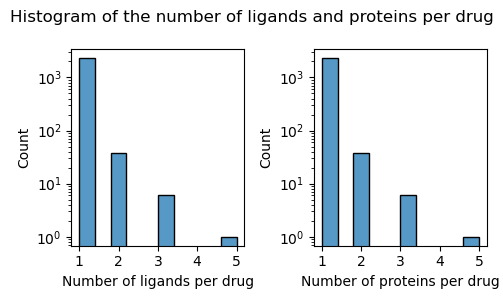

In [337]:
# plotting the number of ligands per drug
fig,axs = plt.subplots(1,2,figsize=(5,3))

# ligands
sns.histplot(grouped_df["num_lig_per_drug"], bins=10,ax=axs[0])
axs[0].set_yscale("log")
axs[0].set_xlabel("Number of ligands per drug")
# lowering the number of ticks on the x-axis to integers
axs[0].set_xticks(np.arange(1, 6, 1))

# proteins
sns.histplot(grouped_df["num_prot_per_drug"], bins=10,ax=axs[1])
axs[1].set_yscale("log")
axs[1].set_xlabel("Number of proteins per drug")
# lowering the number of ticks on the x-axis to integers
axs[1].set_xticks(np.arange(1, 6, 1))

plt.suptitle("Histogram of the number of ligands and proteins per drug")
plt.tight_layout()

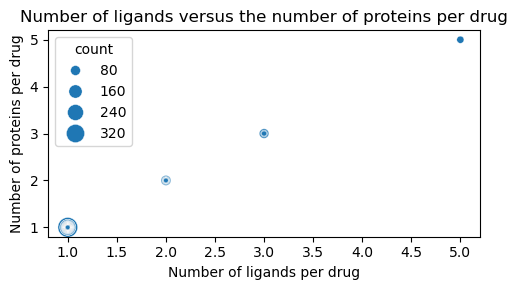

In [338]:
# plot of the number of ligand versus the number of proteins per drug
plt.figure(figsize=(5,3))
sns.scatterplot(data=grouped_df, x="num_lig_per_drug", y="num_prot_per_drug",size="count",sizes=(10, 200))
plt.xlabel("Number of ligands per drug")
plt.ylabel("Number of proteins per drug")
plt.title("Number of ligands versus the number of proteins per drug")
plt.tight_layout()


In [339]:
grouped_df.loc[grouped_df["num_lig_per_drug"]>1]

,count,patent_approved,toxicity,InChI_Key_BindingDB,Ligand InChI,num_prot_per_drug,num_lig_per_drug,unique_toxicity,num_diff_toxicity
name_x,,,,,,,,,
Pimozide,81,0,"[LD<sub>50</sub> = 1100 mg/kg (rat, oral), 228...","[WNRRQSNNNIIUDN-UHFFFAOYSA-N, YVUQSNJEYSNKRX-U...",[InChI=1S/C27H28F2N4O/c28-20-6-10-22(11-7-20)3...,2,2,"LD<sub>50</sub> = 1100 mg/kg (rat, oral), 228 ...",1
Midomafetamine,74,0,[nan],"[SHXWCVYOXRDMCX-QMMMGPOBSA-N, SHXWCVYOXRDMCX-U...",[InChI=1S/C11H15NO2/c1-8(12-2)5-9-3-4-10-11(6-...,3,3,NaN,1
Tryptamine,59,0,[nan],"[APJYDQYYACXCRM-UHFFFAOYSA-N, APJYDQYYACXCRM-U...",[InChI=1S/C10H12N2/c11-6-5-8-7-12-10-4-2-1-3-9...,2,2,NaN,1
Trimethoprim,42,42,[The oral LD<sub>50</sub> in mice and rats is ...,"[IEDVJHCEMCRBQM-UHFFFAOYSA-N, ZQMPUWBQWRAQIQ-U...",[InChI=1S/C14H18N4O3/c1-19-10-5-8(6-11(20-2)12...,2,2,The oral LD<sub>50</sub> in mice and rats is 2...,1
Fenfluramine,35,35,[Overdosage of fenfluramine has been reported;...,"[DBGIVFWFUFKIQN-UHFFFAOYSA-N, DBGIVFWFUFKIQN-S...",[InChI=1S/C12H16F3N/c1-3-16-9(2)7-10-5-4-6-11(...,3,3,Overdosage of fenfluramine has been reported; ...,1
Fenoterol,34,0,[Symptoms of overdose include angina (chest pa...,"[LSLYOANBFKQKPT-UHFFFAOYSA-N, LSLYOANBFKQKPT-D...",[InChI=1S/C17H21NO4/c1-11(6-12-2-4-14(19)5-3-1...,5,5,Symptoms of overdose include angina (chest pai...,1
Doxepin,30,30,[Oral LD50 values of doxepin in mouse and rat ...,"[ODQWQRRAPPTVAG-BOPFTXTBSA-N, CIZGMOQTMITLCC-U...",[InChI=1S/C19H21NO/c1-20(2)13-7-11-17-16-9-4-3...,2,2,Oral LD50 values of doxepin in mouse and rat a...,1
Ibuprofen,30,30,[The symptoms of overdose are presented in ind...,"[HEFNNWSXXWATRW-JTQLQIEISA-N, HEFNNWSXXWATRW-U...",[InChI=1S/C13H18O2/c1-9(2)8-11-4-6-12(7-5-11)1...,2,2,The symptoms of overdose are presented in indi...,1
Ketoconazole,29,29,[Symptoms of overdose include acute liver inju...,"[XMAYWYJOQHXEEK-OZXSUGGESA-N, XMAYWYJOQHXEEK-Z...",[InChI=1S/C26H28Cl2N4O4/c1-19(33)31-10-12-32(1...,2,2,Symptoms of overdose include acute liver injur...,1


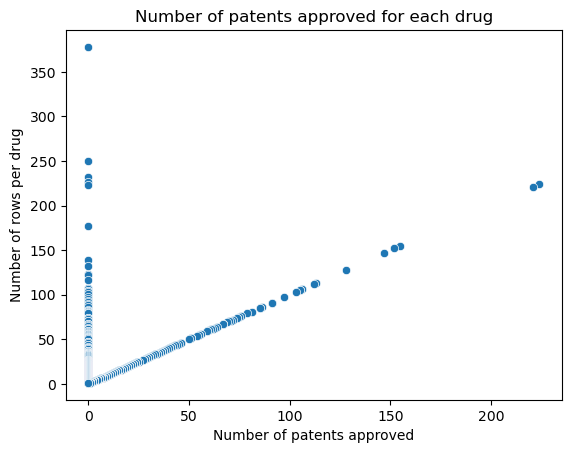

In [340]:
# plot the number of patents approved for each drug

# sns.histplot(grouped_df.loc[grouped_df["patent_approved"]!=0,"patent_approved"], bins=100, kde=True)
sns.scatterplot(grouped_df,x="patent_approved",y="count")
plt.xlabel("Number of patents approved")
plt.ylabel("Number of rows per drug")
plt.title("Number of patents approved for each drug")
plt.show()


In [341]:
# create a loggistic regression test betwwen df_matched["patent_approved"] and df_matched["toxicity"].isna()
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_test = df_matched[["patent_approved","toxicity"]].notna().astype(int)
df_test
mod = smf.ols(formula='patent_approved ~ C(toxicity)', data=df_test)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:        patent_approved   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     9338.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:50:19   Log-Likelihood:                -12553.
No. Observations:               24145   AIC:                         2.511e+04
Df Residuals:                   24143   BIC:                         2.513e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0745      0.004  

<Axes: xlabel='patent_approved', ylabel='toxicity'>

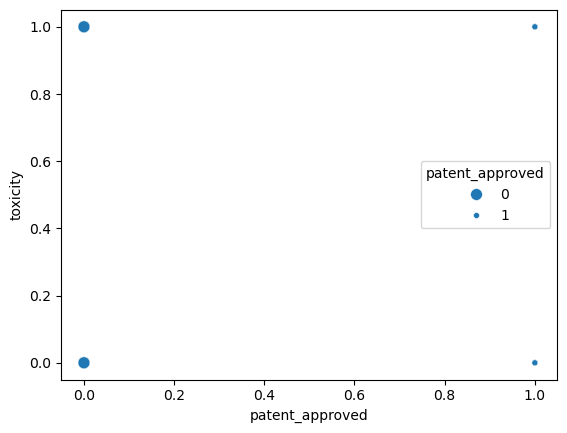

In [342]:
sns.scatterplot(df_test,x="patent_approved",y="toxicity",size="patent_approved")

In [343]:
# test correlation between toxicity and patent_approved which are binary variables
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(df_test["patent_approved"],df_test["toxicity"])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("chi2 :",chi2)
print("p :",p)
print("dof :",dof)
print("expected :",expected)

chi2 : 6731.759988488172
p : 0.0
dof : 1
expected : [[6895.48415821 8619.51584179]
 [3835.51584179 4794.48415821]]


In [344]:
# since the p-value is very low and a chi2 of 6731.7, having used the chi2 test, we can conclude that the two variables are correlated

<Axes: xlabel='patent_approved', ylabel='num_diff_toxicity'>

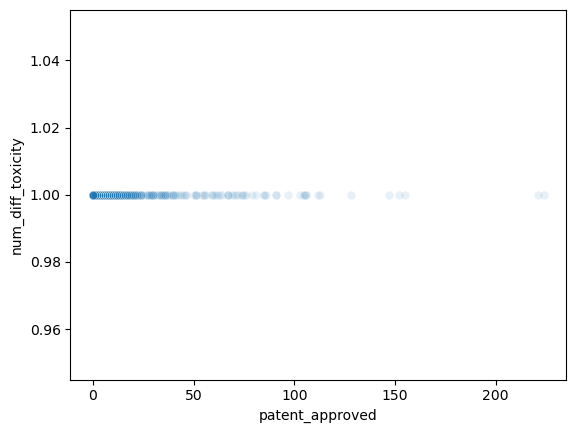

In [345]:
# seaborn plot of a 1D density plot of the number of different toxicities per drug
sns.scatterplot(grouped_df,x="patent_approved",y="num_diff_toxicity",alpha = 0.1)


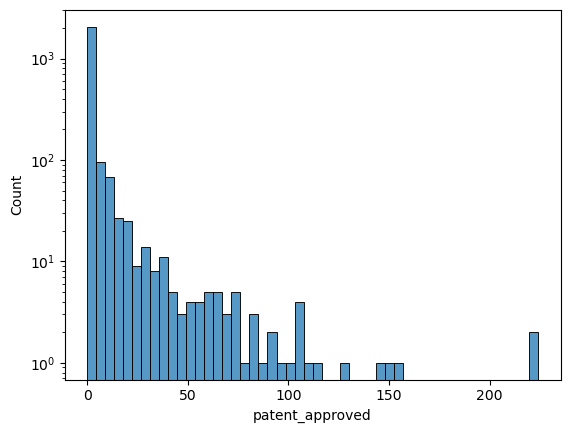

In [346]:
sns.histplot(grouped_df,x="patent_approved",bins=50)
plt.yscale("log")

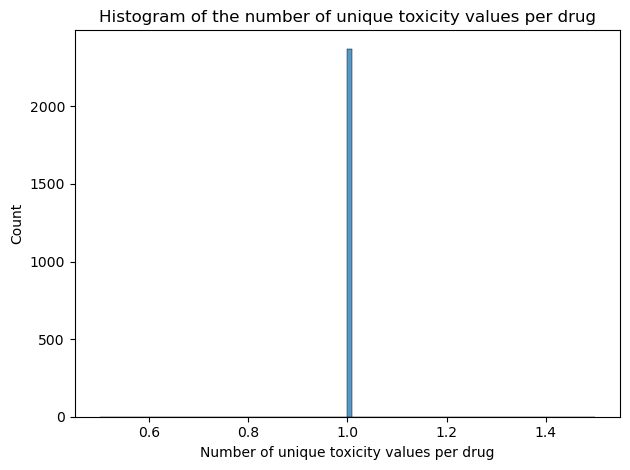

In [347]:
# plot the the number of unique toxicity values per drug
# plt.figure(figsize=(5,5))
sns.histplot(grouped_df["num_diff_toxicity"], bins=100)
# plt.yscale("log")
plt.xlabel("Number of unique toxicity values per drug")
plt.title("Histogram of the number of unique toxicity values per drug")
# lowering the number of ticks on the x-axis to integers
# plt.xticks(np.arange(1, 6, 1))
plt.tight_layout()


In [348]:
print("Total number of drugs :                  ",len(grouped_df))
print("Number of drugs with a toxicity report : ",np.sum(grouped_df["toxicity"].isna()==False).astype(int))
print("Number of unique toxicity reports :      ",len(grouped_df["unique_toxicity"].unique()))

Total number of drugs :                   2371
Number of drugs with a toxicity report :  2371
Number of unique toxicity reports :       660


In [349]:
len(df["InChI_Key_BindingDB"].unique()), len(df["name_y"].unique())

(2747, 1165)

In [350]:
severity_3_keywords = np.array(["severe","fatal","death","lethal","serious","life-threatening","life threatening"])
severity_2_keywords = np.array(["moderate","severe","serious"])
severity_1_keywords = np.array(["mild","moderate","mildly","moderately","moderate"])

In [351]:
grouped_df["unique_toxicity"].unique()


array(['Acute oral toxicity (LD50): 71 mg/kg  in rats [MSDS].  ', nan,
       'The maximally tolerated dose for rat, mouse, and dog when given orally is greater than 500 mg/kg. The maximally tolerated dose of a non-human primate is greater 1200 mg/kg. ',
       'Symptoms of overdose include lethargy, dystonia/spasm, tachycardia, bradycardia, and seizures. LD<sub>50</sub>=57.7 mg/kg (rat, oral) and 34 mg/kg (rat, intravenous).[A1117,A1118,A1119]',
       'Agitation, coma, convulsions, difficulty breathing, difficulty swallowing, dry mouth, extreme sleepiness, fever, intestinal blockage, irregular heart rate, low blood pressure, restlessness',
       'Organic compounds',
       'Overdose cases with dasatinib occurred in isolated cases during clinical studies. Patients that received 280 mg of dasatinib per day for 1 week developed severe myelosuppression and bleeding. Since dasatinib is associated with severe myelosuppression, patients that ingest more than the recommended dosage should b

# Toxicity score

In [352]:
# Making a large string of all toxicity reports text
unique_toxicity_values = " ".join(grouped_df["unique_toxicity"].unique().astype(str))

In [353]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(unique_toxicity_values)

In [354]:
# Count the occurances of each word in that sting

from collections import Counter

words = [token.text for token in doc]

# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common(5)

print(common_words)

[(',', 5202), ('of', 2454), ('and', 2331), ('.', 2309), ('in', 2094)]


In [355]:
# drop punctuation and stop words
words = [token.text for token in doc if token.is_stop != True and token.is_punct != True]

# most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common(1000000)

common_words

[('mg', 1032),
 ('kg', 824),
 ('\r\n\r\n', 732),
 ('overdose', 559),
 ('dose', 395),
 ('>', 393),
 ('rats', 372),
 ('<', 341),
 ('patients', 318),
 ('doses', 317),
 ('oral', 314),
 ('effects', 300),
 ('LD', 290),
 ('times', 258),
 ('include', 255),
 ('sub>50</sub', 251),
 ('studies', 245),
 ('day', 244),
 ('human', 239),
 ('FDA', 226),
 ('mice', 205),
 ('recommended', 202),
 ('adverse', 201),
 ('toxicity', 179),
 ('LD50', 176),
 ('drug', 176),
 ('symptoms', 167),
 ('reported', 167),
 ('Label', 166),
 ('rat', 165),
 ('use', 165),
 ('Oral', 161),
 ('risk', 154),
 ('supportive', 147),
 ('increased', 147),
 ('nausea', 143),
 ('vomiting', 143),
 ('treatment', 141),
 ('observed', 139),
 (' ', 135),
 ('label', 129),
 ('mouse', 128),
 ('Symptoms', 121),
 ('clinical', 120),
 ('renal', 118),
 ('associated', 116),
 ('hypotension', 115),
 ('\r\n', 114),
 ('pregnancy', 112),
 ('severe', 109),
 ('study', 109),
 ('administered', 106),
 ('case', 105),
 ('administration', 105),
 ('including', 105),
 ('

Hand picked words 

In [356]:
toxicity_related_frequent_words = ["overdose","adverse",'toxicity','LD50','nausea','vomiting','renal','hypotension','severe',
                                   'pain','fetal','pregnancy','reactions','fertility','blood','cardiac',"overdosage",'respiratory'
                                   ,'symptomatic','diarrhea','acute','headache','gastrointestinal','depression',"dizziness","coma",
                                   'liver','failure','mutagenic','acid','heart','abdominal','bradycardia','impairment','convulsions',
                                   'hypertension','anemia','anaphylactic','anaphylaxis','arrhythmias','arrhythmia','asthma','bronchospasm',
                                   'bronchial','cancer','carcinogenic','carcinogenicity','cardiotoxicity','cardiovascular','gastric',
                                   'seizures','confusion','hepatic',"carcinogenicity",'death','rash','mutation','arrhythmias']

medical_conditions = [
    "overdose",
    "patients",
    "effects",
    "adverse",
    "toxicity",
    "symptoms",
    "nausea",
    "vomiting",
    "treatment",
    "renal",
    "hypotension",
    "pregnancy",
    "severe",
    "pain",
    "fetal",
    "reactions",
    "fertility",
    "cardiac",
    "diarrhea",
    "headache",
    "gastrointestinal",
    "depression",
    "dizziness",
    "coma",
    "respiratory",
    "symptomatic",
    "diarrhea",
    "acne",
    "liver",
    "failure",
    "drowsiness",
    "seizures",
    "muscle",
    "maternal",
    "gastric",
    "hypertension",
    "death",
    "rash",
    "bladder",
    "edema",
    "children",
    "weakness",
    "insomnia",
    "syndrome",
    "anemia",
    "tumors",
    "acidosis",
    "impaired",
    "infant",
    "pediatric",
    "hallucinations",
    "nervous",
    "irritation",
    "fever",
    "constipation",
    "adenomas",
    "birth",
    "gestation",
    "developmental",
    "prolonged",
    "mutagenicity",
    "lethal",
    "fatigue",
    "sedation",
    "thrombocytopenia",
    "bradycardia",
    "tachycardia",
    "convulsions",
    "arrhythmias",
    "CNS",
    "somnolence",
    "hemodialysis",
    "breast",
    "acne",
    "hepatotoxicity",
    "pulmonary",
    "malformations",
    "thrombocytopenia",
    "lactation",
    "ventricular",
    "sweating",
    "atropine",
    "kidney",
    "hepatotoxicity",
    "restlessness",
    "seizure",
    "emesis",
    "adrenal",
    "carcinomas",
    "neutropenia",
    "allergy",
    "toxicity",
    "arrhythmias",
    "death",
    "hypertension",
    "strokes"
]

In [357]:
# very high severity side effects of cancer related drugs
high_severity = ["cancer","coma","severe","overdose","death","lethal","serious","life-threatening","life threatening","strokes","fatal",]

In [358]:

toxicity_related_frequent_words = np.unique(list(set(toxicity_related_frequent_words + medical_conditions)))

low_severity = []
for word in toxicity_related_frequent_words:
    if word not in high_severity:
        low_severity.append(word)


In [359]:
# add a count of the number of times each word appears in the toxicity string of each drug
grouped_df["toxicity_score"] = grouped_df["unique_toxicity"].apply(lambda x: sum(1 for word in toxicity_related_frequent_words if word in str(x)))
grouped_df["toxicity_score_normalized"] = grouped_df["unique_toxicity"].apply(lambda x: (sum(1 for word in toxicity_related_frequent_words if (word in str(x))) / len(str(x).split()) if len(str(x).split()) != 0 else 0))
grouped_df["weighted_toxicity_score_normalized"] = grouped_df["unique_toxicity"].apply(lambda x: ((sum(3 for word in high_severity if word in str(x)) + sum(1 for word in low_severity if word in str(x))) / len(str(x).split()) if len(str(x).split()) != 0 else 0))
# grouped_df["toxicity_score_normalized"] = grouped_df["toxicity_score"].apply(lambda x: x/len(str(x).split()) if len(str(x).split()) != 0 else 0)

In [360]:
grouped_df

,count,patent_approved,toxicity,InChI_Key_BindingDB,Ligand InChI,num_prot_per_drug,num_lig_per_drug,unique_toxicity,num_diff_toxicity,toxicity_score,toxicity_score_normalized,weighted_toxicity_score_normalized
name_x,,,,,,,,,,,,
Haloperidol,378,0,[Acute oral toxicity (LD50): 71 mg/kg in rats...,[LNEPOXFFQSENCJ-UHFFFAOYSA-N],[InChI=1S/C21H23ClFNO2/c22-18-7-5-17(6-8-18)21...,1,1,Acute oral toxicity (LD50): 71 mg/kg in rats ...,1,2,0.222222,0.222222
Yohimbine,250,0,[nan],[BLGXFZZNTVWLAY-SCYLSFHTSA-N],[InChI=1S/C21H26N2O3/c1-26-21(25)19-15-10-17-2...,1,1,NaN,1,0,0.000000,0.000000
Serotonin,232,0,[nan],[QZAYGJVTTNCVMB-UHFFFAOYSA-N],[InChI=1S/C10H12N2O/c11-4-3-7-6-12-10-2-1-8(13...,1,1,NaN,1,0,0.000000,0.000000
Spiperone,227,0,[nan],[DKGZKTPJOSAWFA-UHFFFAOYSA-N],[InChI=1S/C23H26FN3O2/c24-19-10-8-18(9-11-19)2...,1,1,NaN,1,0,0.000000,0.000000
Sunitinib,224,224,"[The maximally tolerated dose for rat, mouse, ...",[WINHZLLDWRZWRT-ATVHPVEESA-N],[InChI=1S/C22H27FN4O2/c1-5-27(6-2)10-9-24-22(2...,1,1,"The maximally tolerated dose for rat, mouse, a...",1,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
Lawsone,1,0,[nan],[SLJWCCMDGTZEGQ-UHFFFAOYSA-N],[InChI=1S/C10H6O3/c11-8-5-9(12)10(13)7-4-2-1-3...,1,1,NaN,1,0,0.000000,0.000000
Leflunomide,1,0,[LD<sub>50</sub>=100-250 mg/kg (acute oral tox...,[VHOGYURTWQBHIL-UHFFFAOYSA-N],[InChI=1S/C12H9F3N2O2/c1-7-10(6-16-19-7)11(18)...,1,1,LD<sub>50</sub>=100-250 mg/kg (acute oral toxi...,1,2,0.400000,0.400000
Lenvatinib,1,1,[The most common adverse events that occurred ...,[WOSKHXYHFSIKNG-UHFFFAOYSA-N],[InChI=1S/C21H19ClN4O4/c1-29-19-10-17-13(9-14(...,1,1,The most common adverse events that occurred i...,1,17,0.091398,0.091398


In [361]:
grouped_df["toxicity_score"].sort_values(ascending=False)

name_x
Fenofibric acid                                                42
Aripiprazole                                                   42
Dronabinol                                                     37
Metformin                                                      32
Imatinib                                                       31
                                                               ..
Nedisertib                                                      0
M6V3RIU5KI                                                      0
S-55746                                                         0
MK-886                                                          0
{[5-(5-nitro-2-furyl)-1,3,4-oxadiazol-2-yl]thio}acetic acid     0
Name: toxicity_score, Length: 2371, dtype: int64

In [362]:
grouped_df["toxicity_score_normalized"].sort_values(ascending=False)

name_x
Dactinomycin                                                   1.000000
Methylergometrine                                              0.666667
Theophylline                                                   0.666667
Tolmetin                                                       0.545455
Amsacrine                                                      0.545455
                                                                 ...   
Nedisertib                                                     0.000000
M6V3RIU5KI                                                     0.000000
S-55746                                                        0.000000
MK-886                                                         0.000000
{[5-(5-nitro-2-furyl)-1,3,4-oxadiazol-2-yl]thio}acetic acid    0.000000
Name: toxicity_score_normalized, Length: 2371, dtype: float64

In [363]:
grouped_df["weighted_toxicity_score_normalized"].sort_values(ascending=False)

name_x
Dactinomycin                                                   1.000000
Theophylline                                                   0.888889
Buprenorphine                                                  0.846154
Ethosuximide                                                   0.785714
Methotrimeprazine                                              0.777778
                                                                 ...   
Nedisertib                                                     0.000000
M6V3RIU5KI                                                     0.000000
S-55746                                                        0.000000
MK-886                                                         0.000000
{[5-(5-nitro-2-furyl)-1,3,4-oxadiazol-2-yl]thio}acetic acid    0.000000
Name: weighted_toxicity_score_normalized, Length: 2371, dtype: float64

In [364]:
grouped_df.loc["Dactinomycin","toxicity"]

array(['hepatoxicity'], dtype=object)

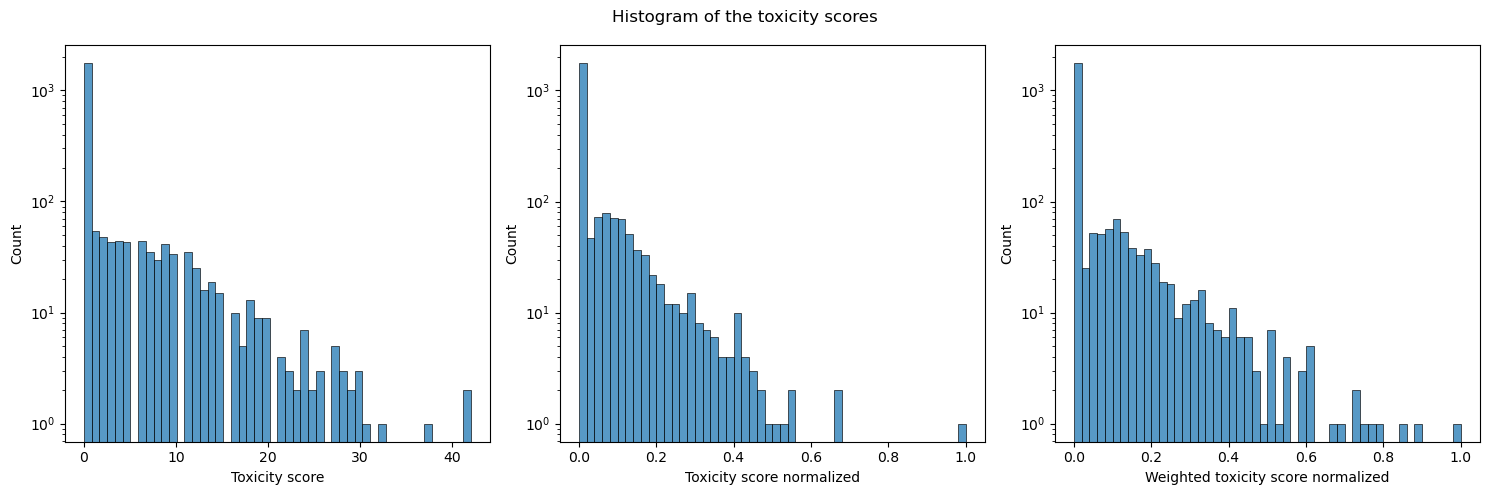

In [365]:
# histograms of toxicity_score, toxicity_score_normalized and weighted_toxicity_score_normalized
fig,axs = plt.subplots(1,3,figsize=(15,5))

# toxicity_score
sns.histplot(grouped_df["toxicity_score"], bins=50,ax=axs[0])
axs[0].set_yscale("log")
axs[0].set_xlabel("Toxicity score")
# lowering the number of ticks on the x-axis to integers
# axs[0].set_xticks(np.arange(0, 50, 5))

# toxicity_score_normalized
sns.histplot(grouped_df["toxicity_score_normalized"], bins=50,ax=axs[1])
axs[1].set_yscale("log")
axs[1].set_xlabel("Toxicity score normalized")
# lowering the number of ticks on the x-axis to integers
# axs[1].set_xticks(np.arange(0, 0.5, 0.05))

# weighted_toxicity_score_normalized
sns.histplot(grouped_df["weighted_toxicity_score_normalized"], bins=50,ax=axs[2])
axs[2].set_yscale("log")
axs[2].set_xlabel("Weighted toxicity score normalized")
# lowering the number of ticks on the x-axis to integers
# axs[2].set_xticks(np.arange(0, 0.5, 0.05))

plt.suptitle("Histogram of the toxicity scores")
plt.tight_layout()


# sns.histplot(grouped_df["toxicity_score"], bins=50)
# plt.yscale("log")

In [366]:
grouped_df_tox = grouped_df.loc[grouped_df["unique_toxicity"].isna() == False]

Text(0.5, 1.0, 'Histogram of the weighted normalized toxicity score')

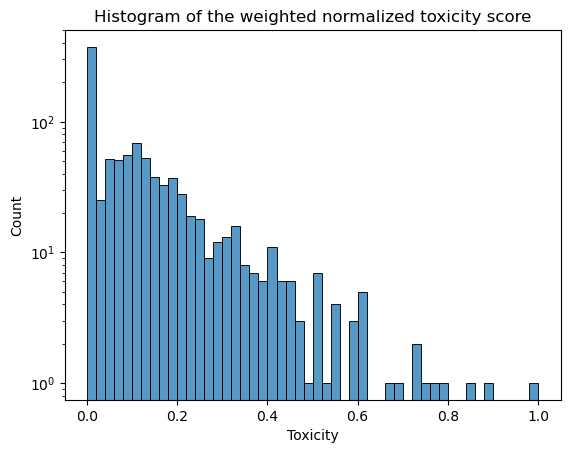

In [367]:
sns.histplot(grouped_df_tox["weighted_toxicity_score_normalized"], bins=50)
plt.yscale("log")
plt.xlabel("Toxicity")
plt.title("Histogram of the weighted normalized toxicity score")

Text(0, 0.5, 'Number of patents approved')

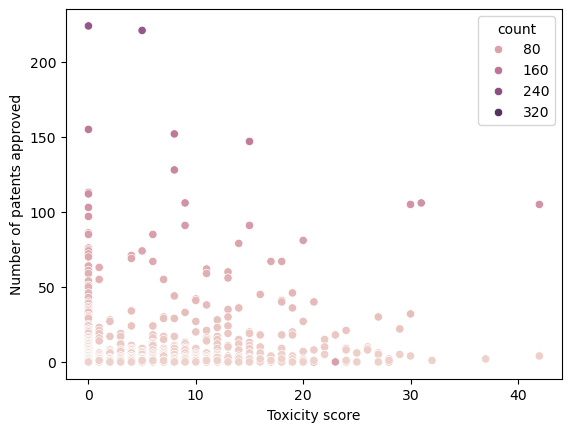

In [368]:
sns.scatterplot(grouped_df,x="toxicity_score",y = "patent_approved",hue="count",alpha = 1)
plt.xlabel("Toxicity score")
plt.ylabel("Number of patents approved")

Text(0.5, 1.0, 'Number of patents approved vs toxicity score')

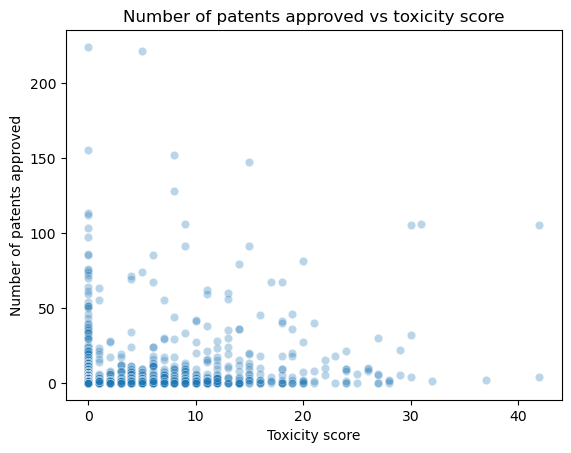

In [369]:
sns.scatterplot(grouped_df,x="toxicity_score",y = "patent_approved",alpha = 0.3)
plt.xlabel("Toxicity score")
plt.ylabel("Number of patents approved")
plt.title("Number of patents approved vs toxicity score")

Text(0.5, 1.0, 'Number of patents approved vs toxicity score')

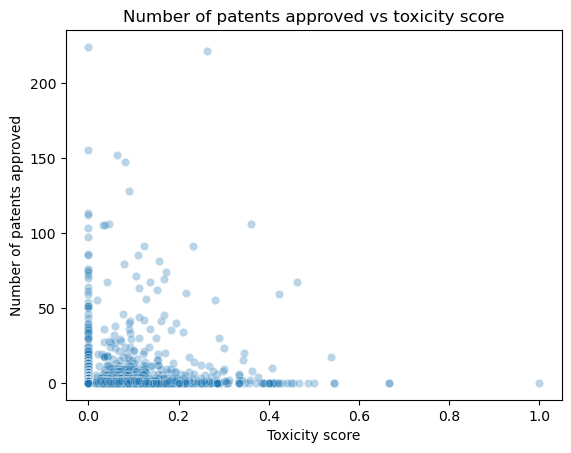

In [370]:
sns.scatterplot(grouped_df,x="toxicity_score_normalized",y = "patent_approved",alpha = 0.3)
plt.xlabel("Toxicity score")
plt.ylabel("Number of patents approved")
plt.title("Number of patents approved vs toxicity score")

Text(0.5, 1.0, 'Number of patents approved vs toxicity score')

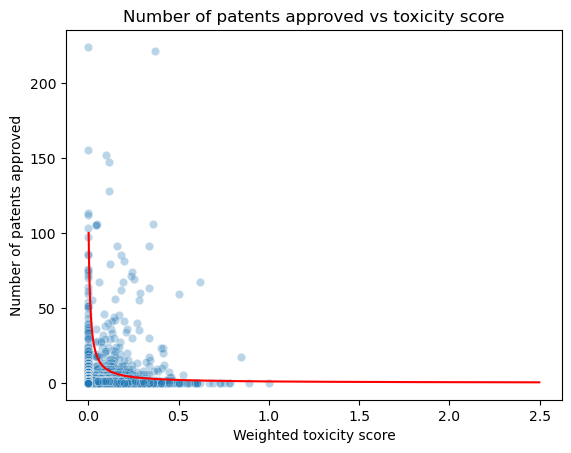

In [371]:
sns.scatterplot(grouped_df,x="weighted_toxicity_score_normalized",y = "patent_approved",alpha = 0.3)
# plt.plot(grouped_df["weighted_toxicity_score_normalized"],np.power(grouped_df["weighted_toxicity_score_normalized"],-0.8),"r.")
plt.plot( np.array(range(1000))*2.5/1000 + 0.001 ,np.power(np.array(range(1000))*2.5/1000 + 0.01,-1),"r")
plt.xlabel("Weighted toxicity score")
plt.ylabel("Number of patents approved")
# plt.ylim(0,200)
plt.title("Number of patents approved vs toxicity score")

Text(0.5, 1.0, 'Number of patents approved vs toxicity score')

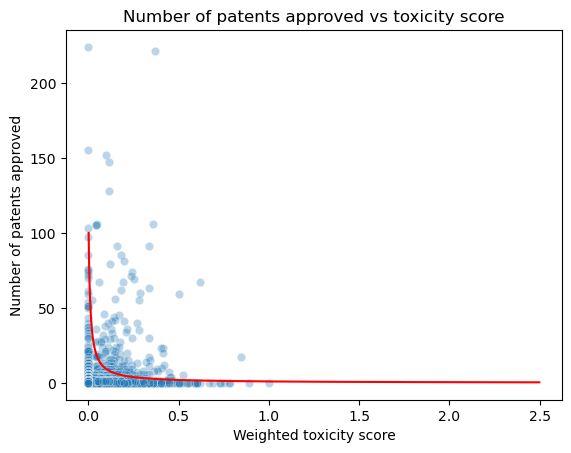

In [372]:
sns.scatterplot(grouped_df_tox,x="weighted_toxicity_score_normalized",y = "patent_approved",alpha = 0.3)
# plt.plot(grouped_df["weighted_toxicity_score_normalized"],np.power(grouped_df["weighted_toxicity_score_normalized"],-0.8),"r.")
plt.plot( np.array(range(1000))*2.5/1000 + 0.001 ,np.power(np.array(range(1000))*2.5/1000 + 0.01,-1),"r")
plt.xlabel("Weighted toxicity score")
plt.ylabel("Number of patents approved")
# plt.ylim(0,200)
plt.title("Number of patents approved vs toxicity score")

<Axes: xlabel='toxicity_score', ylabel='num_prot_per_drug'>

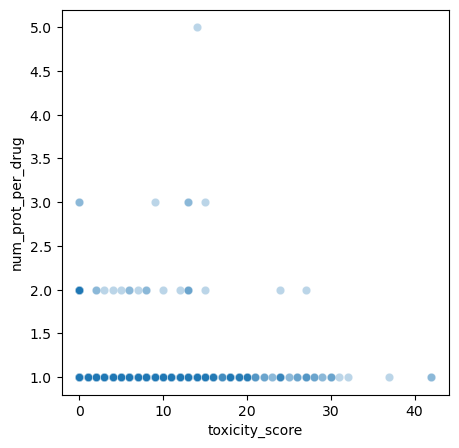

In [373]:
# plot of the number of unique toxicity values per protein
plt.figure(figsize=(5,5))
sns.scatterplot(grouped_df,x="toxicity_score",y = "num_prot_per_drug",alpha = 0.3)

<Axes: xlabel='toxicity_score_normalized', ylabel='num_prot_per_drug'>

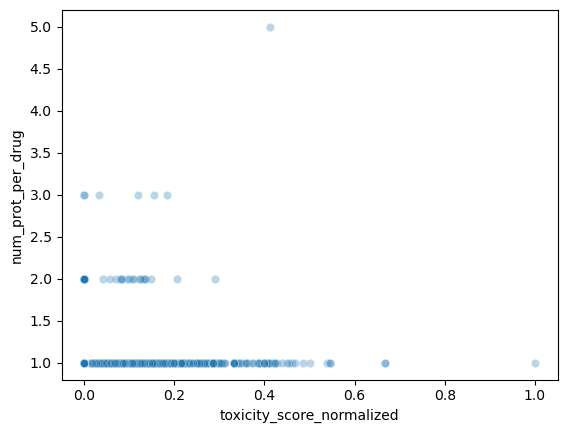

In [374]:
# plot of the number of unique toxicity values per protein
# plt.figure(figsize=(5,5))
sns.scatterplot(grouped_df,x="toxicity_score_normalized",y = "num_prot_per_drug",alpha = 0.3)

In [375]:
from scipy.stats import pearsonr, spearmanr

# Pearson correlation (linear relationship)
pearson_corr, p_val = pearsonr(grouped_df['weighted_toxicity_score_normalized'], grouped_df['patent_approved'])
print(f"Pearson Correlation: {pearson_corr}, P-value: {p_val}")

# Spearman correlation (monotonic relationship)
spearman_corr, p_val = spearmanr(grouped_df['weighted_toxicity_score_normalized'], grouped_df['patent_approved'])
print(f"Spearman Correlation: {spearman_corr}, P-value: {p_val}")

Pearson Correlation: 0.1336757465554599, P-value: 6.361900127956883e-11
Spearman Correlation: 0.39336942515100487, P-value: 1.3776812428417222e-88


In [376]:
from scipy.stats import pearsonr, spearmanr
grouped_df2 = grouped_df.copy()
# Calculate the reciprocal of the normalized toxicity score
grouped_df2['reciprocal_toxicity_score'] = np.power(grouped_df2['weighted_toxicity_score_normalized'], -1)

# Handle potential division by zero or infinite values
grouped_df2['reciprocal_toxicity_score'].replace([float('inf'), -float('inf')], np.nan, inplace=True)
grouped_df2.dropna(subset=['reciprocal_toxicity_score'], inplace=True)

# Pearson correlation (linear relationship)
pearson_corr, p_val = pearsonr(grouped_df2['reciprocal_toxicity_score'], grouped_df2['patent_approved'])
print(f"Pearson Correlation (reciprocal): {pearson_corr}, P-value: {p_val}")

# Spearman correlation (monotonic relationship)
spearman_corr, p_val = spearmanr(grouped_df2['reciprocal_toxicity_score'], grouped_df2['patent_approved'])
print(f"Spearman Correlation (reciprocal): {spearman_corr}, P-value: {p_val}")


Pearson Correlation (reciprocal): 8.33835492138682e-05, P-value: 0.9983574936378926
Spearman Correlation (reciprocal): 0.12953048239387258, P-value: 0.0013209235446354156


/var/folders/_h/sv2httr97w1d8pv18rsdrqhc0000gn/T/ipykernel_33920/2665835576.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grouped_df2['reciprocal_toxicity_score'].replace([float('inf'), -float('inf')], np.nan, inplace=True)


Text(0.5, 1.0, 'Number of patents approved vs toxicity score')

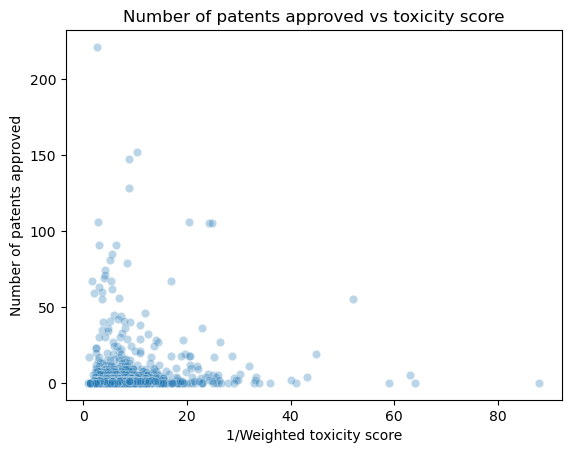

In [377]:
sns.scatterplot(grouped_df2,x="reciprocal_toxicity_score",y = "patent_approved",alpha = 0.3)
plt.xlabel("1/Weighted toxicity score")
plt.ylabel("Number of patents approved")
plt.title("Number of patents approved vs toxicity score")

                            OLS Regression Results                            
Dep. Variable:            log_patents   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.815
Date:                Wed, 11 Dec 2024   Prob (F-statistic):             0.0943
Time:                        15:50:41   Log-Likelihood:                -568.50
No. Observations:                 344   AIC:                             1141.
Df Residuals:                     342   BIC:                             1149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1732      0.219      9.937   

/var/folders/_h/sv2httr97w1d8pv18rsdrqhc0000gn/T/ipykernel_33920/4099748203.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['log_toxicity'] = np.log(filtered_df['weighted_toxicity_score_normalized'])
/var/folders/_h/sv2httr97w1d8pv18rsdrqhc0000gn/T/ipykernel_33920/4099748203.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['log_patents'] = np.log(filtered_df['patent_approved'])


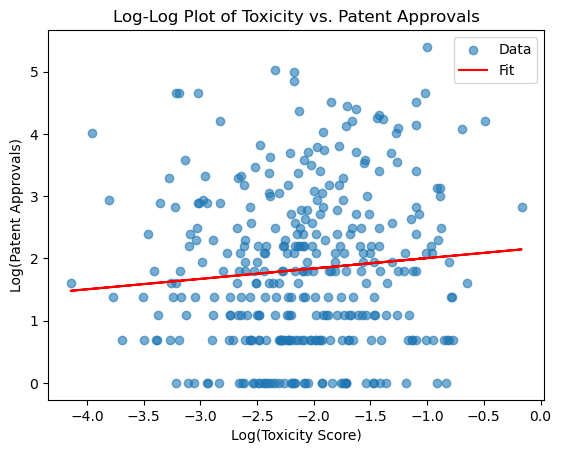

In [378]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Filter out rows where scores or approvals are zero (logarithm undefined)
filtered_df = grouped_df[(grouped_df['weighted_toxicity_score_normalized'] > 0) & 
                         (grouped_df['patent_approved'] > 0)]

# Log transformation
filtered_df['log_toxicity'] = np.log(filtered_df['weighted_toxicity_score_normalized'])
filtered_df['log_patents'] = np.log(filtered_df['patent_approved'])

# Fit a linear regression model
X = sm.add_constant(filtered_df['log_toxicity'])
y = filtered_df['log_patents']
model = sm.OLS(y, X).fit()

# Print results
print(model.summary())

# Plot the relationship
plt.scatter(filtered_df['log_toxicity'], filtered_df['log_patents'], alpha=0.6, label="Data")
plt.plot(filtered_df['log_toxicity'], model.predict(X), color='red', label="Fit")
plt.xlabel("Log(Toxicity Score)")
plt.ylabel("Log(Patent Approvals)")
plt.legend()
plt.title("Log-Log Plot of Toxicity vs. Patent Approvals")
plt.show()


In [379]:
# Inverse relationship test: Reversing one variable (e.g., patent approval)
reversed_pearson_corr, reversed_p_val = pearsonr(grouped_df['weighted_toxicity_score_normalized'], -grouped_df['patent_approved'])
print(f"Reversed Pearson Correlation: {reversed_pearson_corr}, P-value: {reversed_p_val}")


Reversed Pearson Correlation: -0.1336757465554599, P-value: 6.361900127956883e-11


Slope: -2.1681759209697673
Intercept: 8.702954635835617
R-squared: 0.00024154865017769005
P-value: 0.7011853117601885


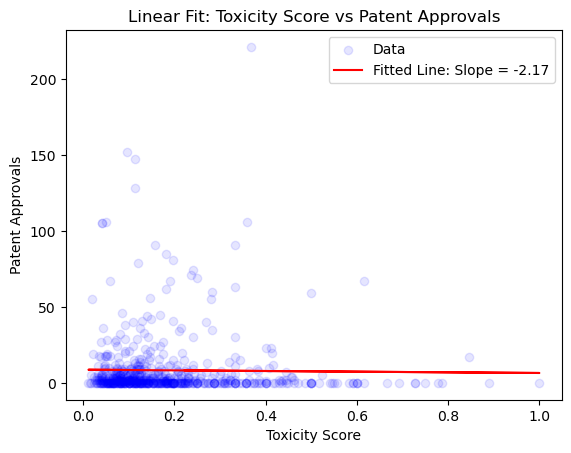

In [380]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

temp = grouped_df.copy()
temp = temp.loc[temp['weighted_toxicity_score_normalized'] > 0]
# Fit a linear regression with normal data
X = np.array(temp['weighted_toxicity_score_normalized'])
y = np.array(temp['patent_approved'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

# Plot the data points
plt.scatter(X, y, color='blue', label='Data',alpha = 0.1)

# Plot the fitted line
plt.plot(X, slope*X + intercept, color='red', label=f"Fitted Line: Slope = {slope:.2f}")
plt.xlabel("Toxicity Score")
plt.ylabel("Patent Approvals")
plt.title("Linear Fit: Toxicity Score vs Patent Approvals")
plt.legend()
plt.show()


In [381]:
len(X[X<0.1]), len(X[(X>0.2) & (X<1)])

(189, 187)

In [382]:
# Inverse relationship test: Reversing one variable (e.g., patent approval)
reversed_pearson_corr, reversed_p_val = pearsonr(X,y)
print(f"Reversed Pearson Correlation: {reversed_pearson_corr}, P-value: {reversed_p_val}")


Reversed Pearson Correlation: -0.015541835482905313, P-value: 0.7011853117601848


In [383]:
# Spearman correlation (monotonic relationship)
spearman_corr, p_val = spearmanr(X,y)
print(f"Spearman Correlation: {spearman_corr}, P-value: {p_val}")

Spearman Correlation: -0.12953048239387258, P-value: 0.0013209235446354156


In [384]:
grouped_df_tox.loc[grouped_df_tox["weighted_toxicity_score_normalized"]==0,"unique_toxicity"]

name_x
Sunitinib     The maximally tolerated dose for rat, mouse, a...
GRZ5RCB1QG                                    Organic compounds
Mianserin                    Oral rat LD<sub>50</sub>: 780mg/kg
01K63SUP8D                                    Organic compounds
S79426A41Z                                    Organic compounds
                                    ...                        
K7KY60XF2T                                    Organic compounds
K9KAV4K6BN                                    Organic compounds
KOO1113T0V                                    Organic compounds
L6JW2TJG99                                    Organic compounds
LW4J8Q7HMC                                    Organic compounds
Name: unique_toxicity, Length: 368, dtype: object

In [385]:
# print the content of df_matched.loc[df_matched["name_x"]=="K7KY60XF2T"] with loop because too many columns
for index, row in df_matched.iterrows():
    if row["name_x"] == "K7KY60XF2T":
        for column in df_matched.columns:
            print(f"{column} :                                          {row[column]}")
        break
    
    




BindingDB Reactant_set_id :                                          28700
SMILES :                                          Nc1cccc(CCc2ccc3cc[nH]c3c2)n1
Ligand InChI :                                          InChI=1S/C15H15N3/c16-15-3-1-2-13(18-15)7-5-11-4-6-12-8-9-17-14(12)10-11/h1-4,6,8-10,17H,5,7H2,(H2,16,18)
InChI_Key :                                          OSHSZKRWKLQZBV-UHFFFAOYSA-N
BindingDB_ID :                                          15779
BindingDB Ligand Name :                                          6-Substituted 2-Aminopyridine 3::6-[2-(1H-indol-6-yl)ethyl]pyridin-2-amine
Target Name :                                          Beta-secretase 1
Target Source Organism According to Curator or DataSource :                                          Homo sapiens
Ki (nM) :                                          -1.0
IC50 (nM) :                                          94000.0
Kd (nM) :                                          -1.0
EC50 (nM) :                              